In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import libraries

Primero importamos las librerías necesarias para el proyecto

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix # for model evaluation metrics
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR, SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# Visualizaciones
import plotly.graph_objects as go
import plotly.express as px

### Import data

Importamos los datos que vamos a utilizar para nuestro proyecto

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ironhack/ProyectoFinal/train_conductivity.csv', sep = ';')
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


### Describe and prepare data

El siguiente comando imprimirá un resumen del DataFrame df, incluyendo el tipo de datos y la cantidad de valores no nulos en cada columna.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

El siguiente comando proporciona estadísticas descriptivas para cada columna numérica en el Dataframe

In [ ]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


El siguiente comando proporciona la cantidad de filas y columnas respectivamente en el DataFrame

In [ ]:
df.shape

(21263, 82)

Con el siguiente comando vemos todas las columnas que tenemos en el Dataframe

In [ ]:
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

#### Train-test split

- Utilizamos el 80% de los datos para el entrenamiento y el 20% para el test
- Seleccionamos todas las filas del DataFrame (:) y todas las columnas excepto la última ([:-1]). En otras palabras, seleccionamos todas las características (o variables independientes) del conjunto de datos.
- df.iloc[:, -1:] selecciona todas las filas del DataFrame y la última columna. Es importante mencionar que el resultado de esta expresión será un DataFrame
- 'random_state=0': Este parámetro establece una semilla para la generación de números aleatorios. Establecer esto garantiza que, aunque la división de los datos sea aleatoria, la división será la misma cada vez que ejecutemos el código. Esto es útil para reproducibilidad.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],
                                                    df.iloc[:,-1:], train_size = 0.8, random_state = 0)
X_train.head(3)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
19439,3,81.803833,83.599571,80.225294,82.565599,1.079165,0.941455,39.3595,36.042000,16.193787,...,4.666667,5.428571,4.160168,5.128508,1.004242,0.809205,4,3.142857,1.885618,1.399708
8974,6,95.578967,61.724069,69.968018,37.195230,1.539284,1.482293,192.9810,26.047184,67.287842,...,2.666667,2.421333,2.492883,2.279530,1.717076,1.421206,3,1.002667,1.105542,1.021671
11826,2,60.332250,55.636875,59.596931,55.099520,0.680984,0.621712,18.7815,20.775375,9.390750,...,4.000000,4.500000,3.872983,4.400559,0.661563,0.450561,2,3.000000,1.000000,0.866025


Nos quedamos con las variables clave que posteriormente escalaremos y vamos a imprimir por ejemplo "X_test_red_sc" que será "X_test" con las variables que hemos cogido y que posteriormente hemos escalado con "StandardScaler()" para ver que lo hemos hecho bien

In [ ]:
variables = ['number_of_elements','mean_atomic_mass','mean_fie','mean_atomic_radius','mean_Density','mean_ElectronAffinity',
             'mean_FusionHeat','mean_ThermalConductivity','mean_Valence']
scaler = StandardScaler()
SC_scaler = scaler.fit(X_train[variables])
X_train_red_sc= SC_scaler.transform(X_train[variables]) #Reducimos
X_test_red_sc = SC_scaler.transform(X_test[variables])

X_train_red_sc = pd.DataFrame(X_train_red_sc, columns = X_train[variables].columns)
X_test_red_sc = pd.DataFrame(X_test_red_sc, columns = X_test[variables].columns)
print(X_test_red_sc.shape)
print(X_test_red_sc.columns)

(4253, 9)
Index(['number_of_elements', 'mean_atomic_mass', 'mean_fie',
       'mean_atomic_radius', 'mean_Density', 'mean_ElectronAffinity',
       'mean_FusionHeat', 'mean_ThermalConductivity', 'mean_Valence'],
      dtype='object')


Ahora tenemos solo 9 columnas para X_train y para X_test, que son las 9 variables que hemos escogido.

In [ ]:
print(y_train.columns)
print(y_test.columns)

Index(['critical_temp'], dtype='object')
Index(['critical_temp'], dtype='object')


Como vemos, en la columna de "y_train" y de "y_test", únicamente tendremos la columna "critical_temp" que es la variable que queremos predecir

Creamos una matriz de correlación que será nuestro Dataframe pero únicamente con las variables seleccionadas anteriormente y la visualizamos como un mapa de calor utilizando "seaborn"

<Axes: >

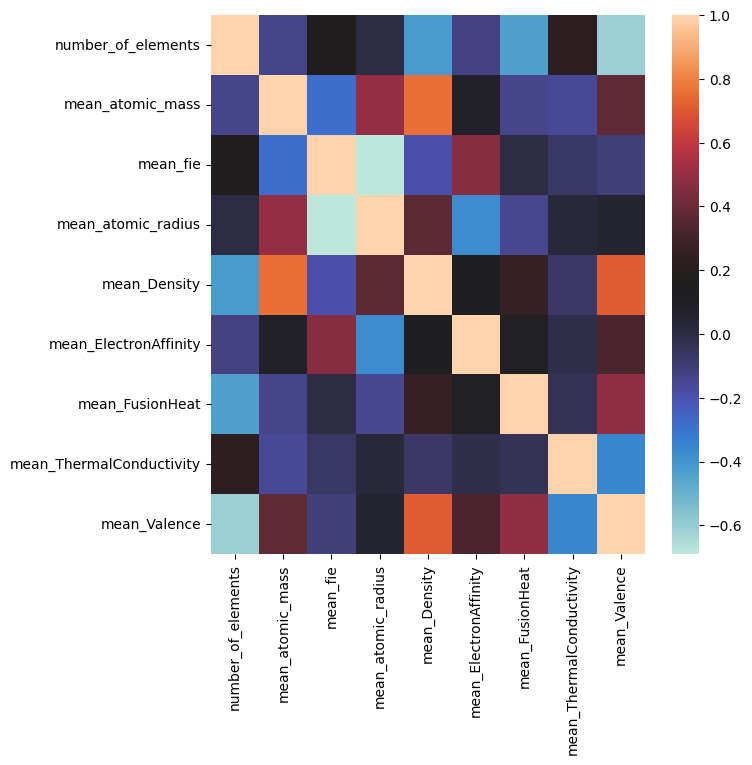

In [ ]:
df_corr= df[variables]

plt.figure(figsize=(7,7))
corr = df_corr.corr()
sns.heatmap(corr,cmap='icefire')

Para visualizar las relaciones entre todas las variables en el conjunto de datos, mostrando gráficos de dispersión para las combinaciones de variables numéricas e histogramas para las variables individuales

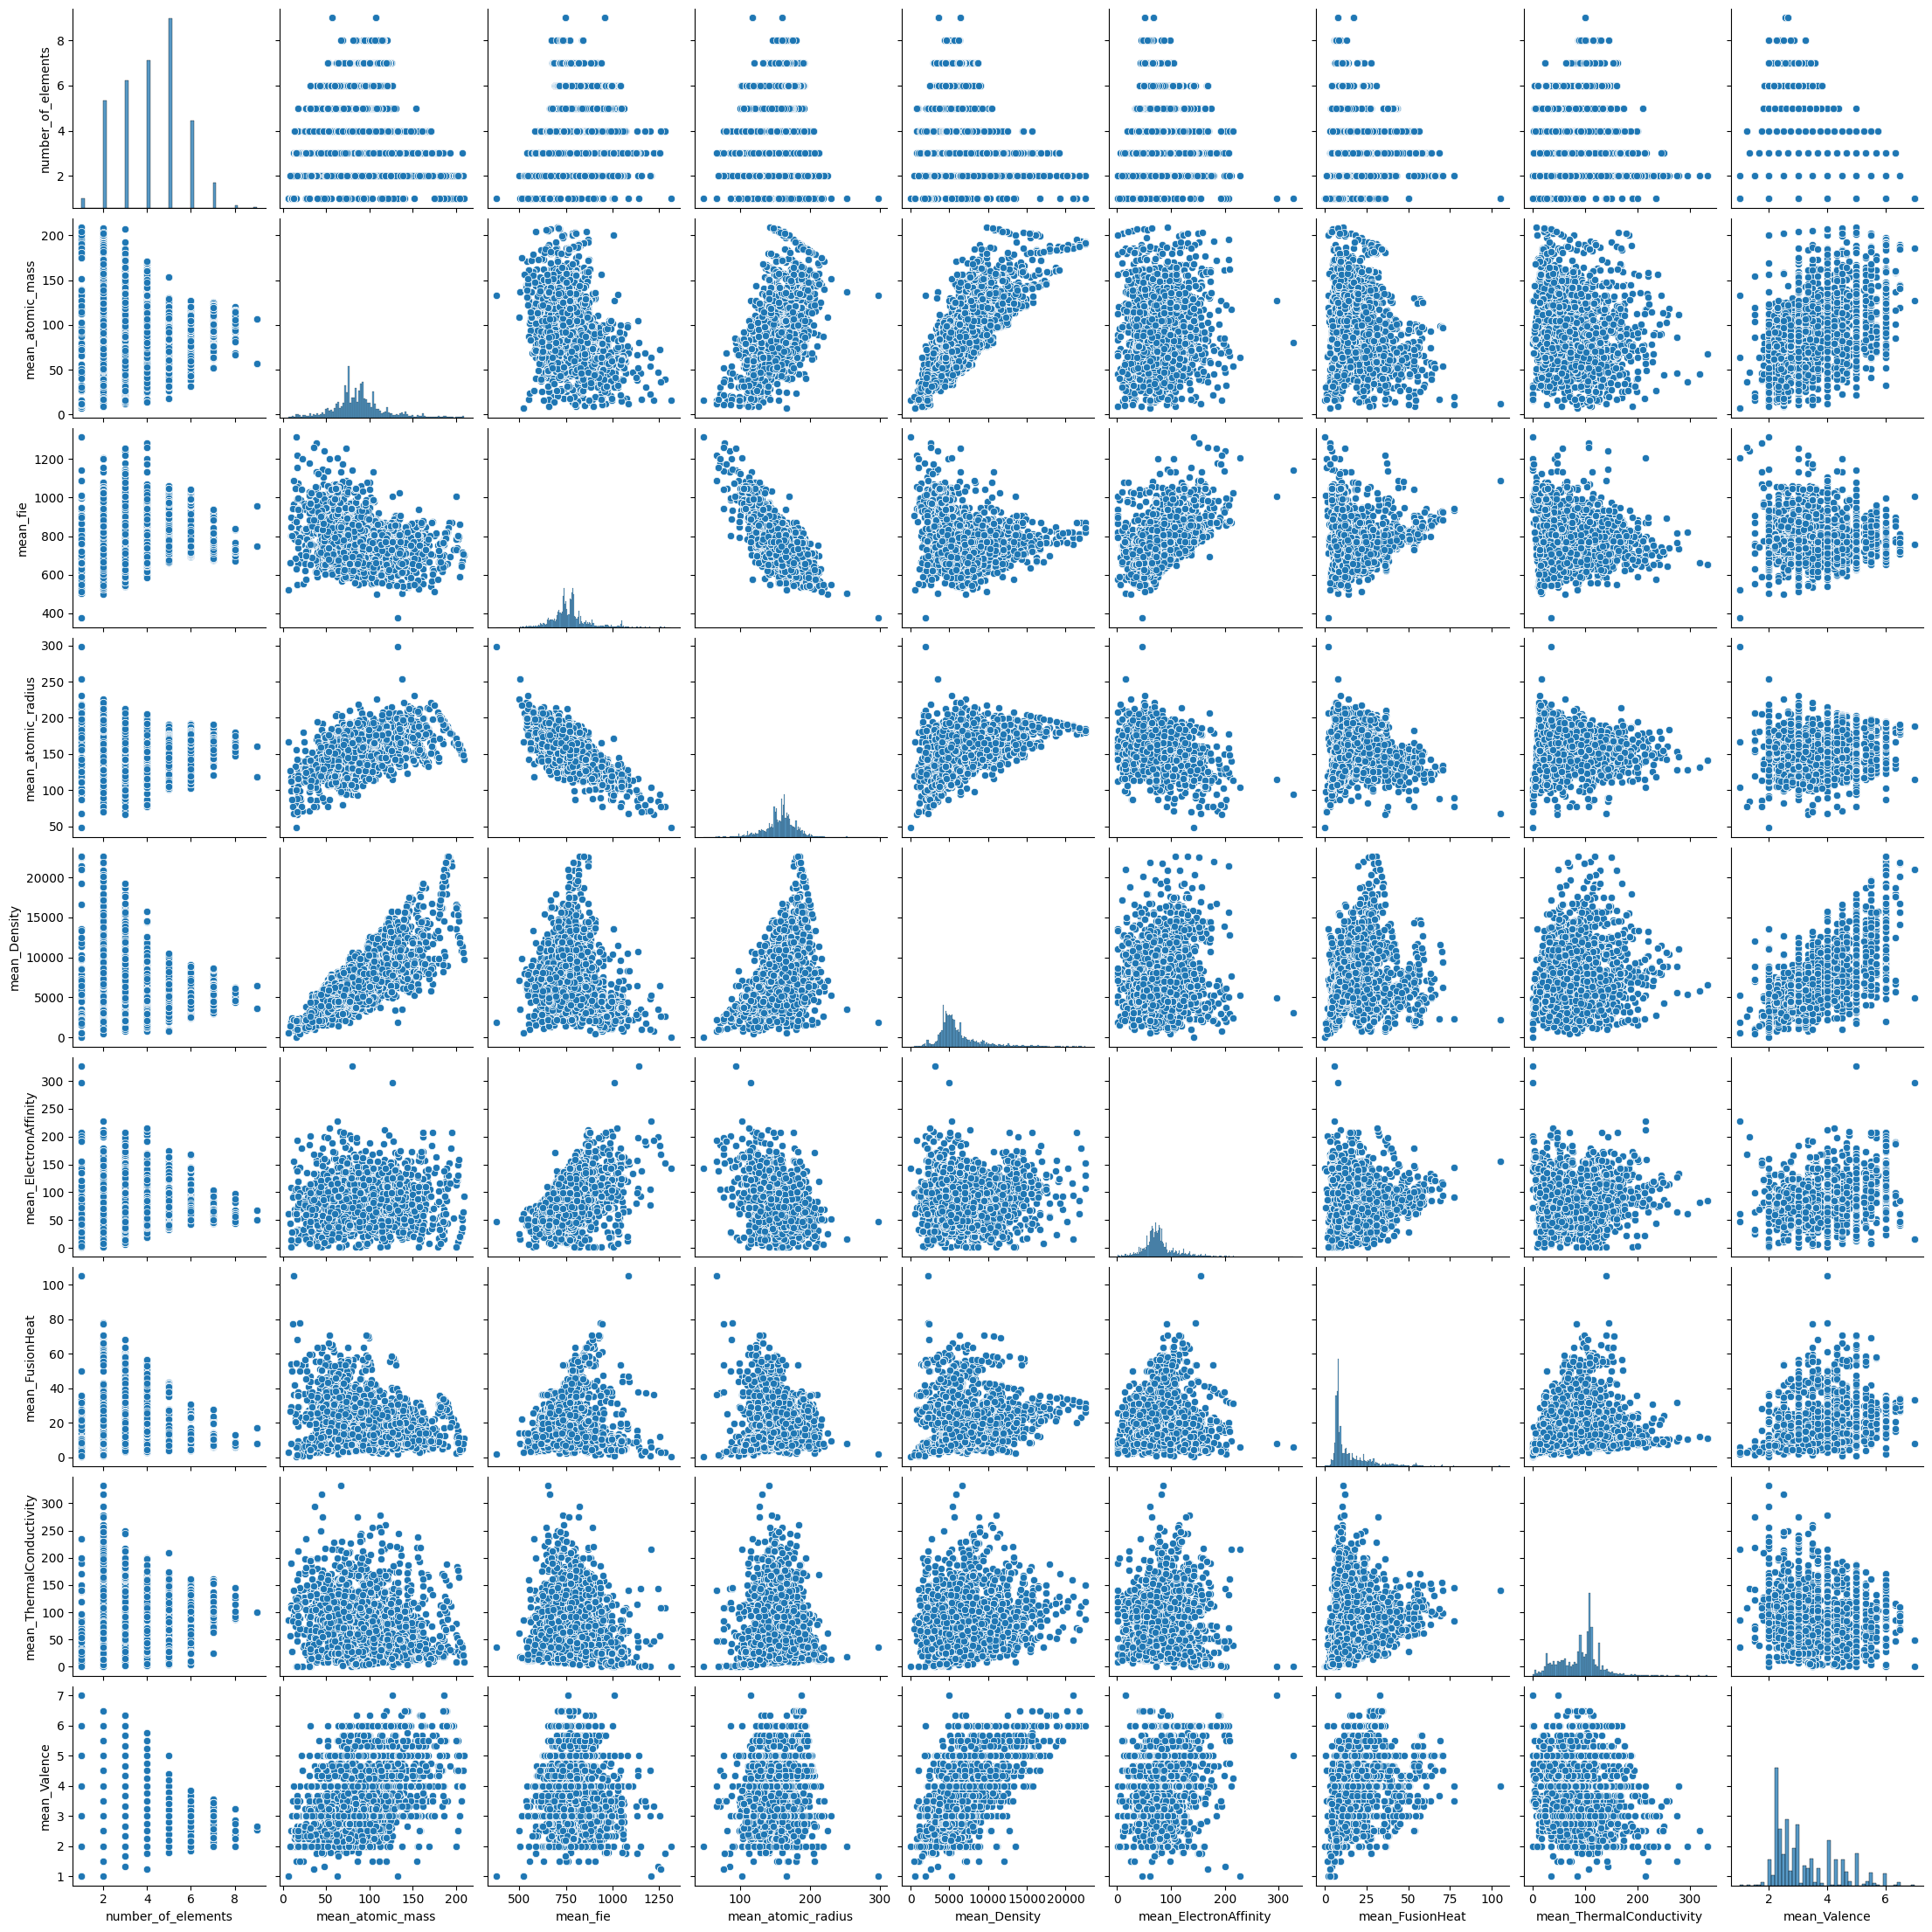

In [ ]:
sns.pairplot(df_corr)

Escalamos los datos y luego creamos DataFrames con los datos escalados

In [ ]:
scaler = StandardScaler()
SC_scaler = scaler.fit(X_train)
X_train_sc= SC_scaler.transform(X_train)
X_test_sc = SC_scaler.transform(X_test)

X_train_sc = pd.DataFrame(X_train_sc, columns = X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns = X_test.columns)
X_test_sc.shape

(4253, 81)

### MLP Regression

- La regresión de perceptrón multicapa (MLP) es un tipo de modelo de regresión basado en redes neuronales artificiales con múltiples capas (también conocidas como redes neuronales profundas). Los MLP son capaces de aprender relaciones no lineales complejas en los datos.
- "BatchNormalization" es una técnica comúnmente utilizada en redes neuronales para mejorar la convergencia y el rendimiento del modelo. "Batch Normalization" normaliza la entrada de cada capa, ajustando y escalando los valores para que tengan una media cercana a cero y una desviación estándar cercana a uno. Esto ayuda a estabilizar y acelerar el entrenamiento de la red.
- También he añadido Dropout() para evitar overfitting

Primero vamos a probar a entrenar nuestro modelo con todos nuestros datos, es decir, con el X_train original

In [ ]:
MLP_Reg = Sequential()
MLP_Reg.add(Dense(120, input_shape=(81,), activation='relu', kernel_regularizer = l1(0.01)))

MLP_Reg.add(Dense(240, activation='relu', kernel_regularizer = l1(0.01)))
MLP_Reg.add(BatchNormalization())
MLP_Reg.add(Dropout(0.2))

MLP_Reg.add(Dense(64, activation='relu', kernel_regularizer = l1(0.01)))
MLP_Reg.add(BatchNormalization())
MLP_Reg.add(Dropout(0.2))

MLP_Reg.add(Dense(1, kernel_regularizer = l1(0.01)))

Optimizador

In [ ]:
# Learning rate and optimizer
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

Compilamos el modelo con la métrica que queremos (MAE)

In [ ]:
# compile the keras model
MLP_Reg.compile(loss='MeanAbsoluteError', optimizer='Adam', metrics=['MeanAbsoluteError'])

Entrenamos el modelo

In [ ]:
history_Reg = MLP_Reg.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=70, batch_size=100)

Epoch 1/70
171/171 [==============================] - 4s 10ms/step - loss: 49.5957 - mean_absolute_error: 33.0044 - val_loss: 35.0850 - val_mean_absolute_error: 30.3564
Epoch 2/70
171/171 [==============================] - 1s 8ms/step - loss: 28.3046 - mean_absolute_error: 25.8033 - val_loss: 26.7338 - val_mean_absolute_error: 25.1992
Epoch 3/70
171/171 [==============================] - 1s 8ms/step - loss: 17.1391 - mean_absolute_error: 15.6186 - val_loss: 21.9706 - val_mean_absolute_error: 20.3048
Epoch 4/70
171/171 [==============================] - 1s 6ms/step - loss: 13.1696 - mean_absolute_error: 11.4403 - val_loss: 15.1117 - val_mean_absolute_error: 13.5253
Epoch 5/70
171/171 [==============================] - 1s 6ms/step - loss: 12.3749 - mean_absolute_error: 10.8237 - val_loss: 13.4163 - val_mean_absolute_error: 11.8997
Epoch 6/70
171/171 [==============================] - 1s 5ms/step - loss: 12.0292 - mean_absolute_error: 10.5310 - val_loss: 11.5965 - val_mean_absolute_error:

Evaluamos el modelo

In [ ]:
# evaluate the keras model
_, mae_tr = MLP_Reg.evaluate(X_train_sc, y_train)
_, mae_ts = MLP_Reg.evaluate(X_test_sc, y_test)
print('MAE train: %.2f' % (mae_tr))
print('MAE test: %.2f' % (mae_ts))

133/133 [==============================] - 0s 3ms/step - loss: 9.8715 - mean_absolute_error: 8.5774
MAE train: 8.12
MAE test: 8.58


Vemos la gráfica comparado nuestros datos de train con los de test

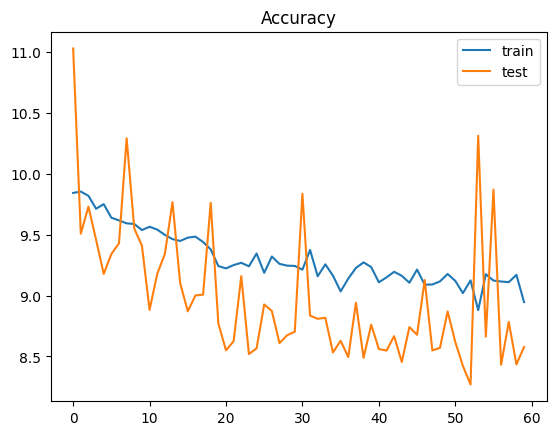

In [ ]:
plt.subplot()
plt.title('Accuracy')
plt.plot(history_Reg.history['mean_absolute_error'][10:], label='train')
plt.plot(history_Reg.history['val_mean_absolute_error'][10:], label='test')
plt.legend()

Vemos que tanto los datos de train como los de test llevan la misma tendencia por lo que no hay overfitting

Ahora probamos solo con los datos que seleccionamos anteriormente, es decir, los que tenemos en df_corr, con nuestros "X_train_red_sc" y "X_test_red_sc"

In [ ]:
MLP_Reg = Sequential()
MLP_Reg.add(Dense(120, input_shape=(9,), activation='relu', kernel_regularizer = l1(0.01)))

MLP_Reg.add(Dense(240, activation='relu', kernel_regularizer = l1(0.01)))
MLP_Reg.add(BatchNormalization())
MLP_Reg.add(Dropout(0.2))

MLP_Reg.add(Dense(64, activation='relu', kernel_regularizer = l1(0.01)))
MLP_Reg.add(BatchNormalization())
MLP_Reg.add(Dropout(0.2))

MLP_Reg.add(Dense(1, kernel_regularizer = l1(0.01)))

Optimizador

In [ ]:
# Learning rate and optimizer
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

Compilamos el modelo con la métrica que queremos (MAE)

In [ ]:
# compile the keras model
MLP_Reg.compile(loss='MeanAbsoluteError', optimizer='Adam', metrics=['MeanAbsoluteError'])

Entrenamos el modelo

In [ ]:
history_Reg = MLP_Reg.fit(X_train_red_sc, y_train, validation_data=(X_test_red_sc, y_test), epochs=70, batch_size=100)

Epoch 1/70
171/171 [==============================] - 3s 7ms/step - loss: 45.2207 - mean_absolute_error: 33.1035 - val_loss: 35.3292 - val_mean_absolute_error: 32.5704
Epoch 2/70
171/171 [==============================] - 1s 6ms/step - loss: 28.1013 - mean_absolute_error: 26.1893 - val_loss: 29.3114 - val_mean_absolute_error: 27.7158
Epoch 3/70
171/171 [==============================] - 1s 6ms/step - loss: 18.1188 - mean_absolute_error: 16.5311 - val_loss: 22.6946 - val_mean_absolute_error: 21.1418
Epoch 4/70
171/171 [==============================] - 1s 6ms/step - loss: 14.3981 - mean_absolute_error: 12.8296 - val_loss: 17.1787 - val_mean_absolute_error: 15.6791
Epoch 5/70
171/171 [==============================] - 1s 6ms/step - loss: 13.6361 - mean_absolute_error: 12.1427 - val_loss: 14.4557 - val_mean_absolute_error: 12.9842
Epoch 6/70
171/171 [==============================] - 1s 6ms/step - loss: 13.3195 - mean_absolute_error: 11.8819 - val_loss: 13.9598 - val_mean_absolute_error: 

In [ ]:
# evaluate the keras model
_, mae_tr = MLP_Reg.evaluate(X_train_red_sc, y_train)
_, mae_ts = MLP_Reg.evaluate(X_test_red_sc, y_test)
print('MAE train: %.2f' % (mae_tr))
print('MAE test: %.2f' % (mae_ts))

133/133 [==============================] - 0s 3ms/step - loss: 11.1840 - mean_absolute_error: 9.9299
MAE train: 9.26
MAE test: 9.93


Vemos la gráfica comparado nuestros datos de train con los de test

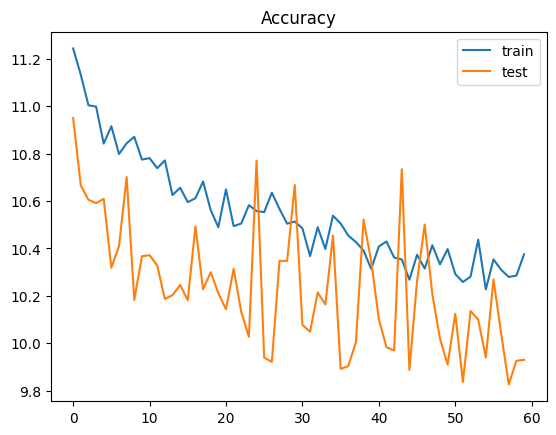

In [ ]:
plt.subplot()
plt.title('Accuracy')
plt.plot(history_Reg.history['mean_absolute_error'][10:], label='train')
plt.plot(history_Reg.history['val_mean_absolute_error'][10:], label='test')
plt.legend()

Vemos que tanto los datos de train como los de test llevan la misma tendencia por lo que no hay overfitting

**Conclusión:** No se nota mucha diferencia de mejora entre utilizar el Dataframe original y utilizar el Dataframe con las variables seleccionadas, pero si hubiera que elegir, es un poco mejor el resultado con las variables "X_train_sc" y "X_test_sc"

### XGBoost

XGBoost, que significa eXtreme Gradient Boosting, es un algoritmo popular y poderoso de aprendizaje automático que pertenece a la clase de métodos de aprendizaje conjunto (ensemble learning).

Este código realiza una búsqueda en cuadrícula para encontrar los mejores hiperparámetros para nuestro modelo XGBoost

- n_estimators: La cantidad de modelos a construir secuencialmente.
- learning_rate: Controla la contribución de cada modelo al conjunto.
- max_depth: Limita la profundidad de los árboles base.
- estimator=XG_Reg: Especifica el estimador para el cual se realizará la búsqueda de hiperparámetros.
- param_grid=grid: Indica el diccionario de parámetros que se probarán durante la búsqueda.
- n_jobs=-1: Utiliza todos los núcleos disponibles para paralelizar la búsqueda de hiperparámetros, lo que puede acelerar el proceso.
- cv: Especifica la estrategia de validación cruzada que se utilizará.
- scoring='neg_mean_absolute_error': Define la métrica de evaluación que se utilizará para evaluar el rendimiento del modelo con cada combinación de hiperparámetros. En este caso, se utiliza el error absoluto medio negativo (neg_mean_absolute_error). La negación se debe a que GridSearchCV maximiza la métrica, pero en el caso del error, queremos minimizarlo.

In [ ]:
from xgboost import XGBRegressor

XG_Reg = XGBRegressor()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [100]


grid['learning_rate'] = [0.1]
grid['max_depth'] = [8]

# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=XG_Reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error')
# execute the grid search
grid_result = grid_search.fit(X_train_red_sc, y_train)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -8.315943 using {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
-8.315943 (0.139570) with: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}


Creamos una instancia de XGBRegressor con los hiperparámetros learning_rate, n_estimators, y max_depth establecidos en 0.1, 100, y 5 respectivamente, y luego ajustamos el modelo a nuestros datos de entrenamiento

In [ ]:
XG_Reg = XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 5)
XG_Reg.fit(X_train_red_sc, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Tratamos de realizar predicciones en el conjunto de prueba (X_test) utilizando el modelo XGBoost (XG_Reg) que hemos entrenado previamente

In [ ]:
X_predict = X_test.copy()
X_predict['XG_Reg'] = XG_Reg.predict(X_test_red_sc)

Calculamos varias métricas de evaluación de regresión para las predicciones de nuestro modelo en el conjunto de prueba

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, X_predict['XG_Reg']).round(4))
print("MSE: ", metrics.mean_squared_error(y_test, X_predict['XG_Reg']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, X_predict['XG_Reg'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, X_predict['XG_Reg']).round(4))
print("R2: ", metrics.r2_score(y_test, X_predict['XG_Reg']).round(4))

MAE:  9.7924
MSE:  217.2895
RMSE:  14.7407
MAPE:  6.3222
R2:  0.8133


Creamos un gráfico de dispersión (scatter plot) para visualizar las predicciones (XG_Reg) en comparación con los valores reales (critical_temp)

<Axes: xlabel='critical_temp', ylabel='XG_Reg'>

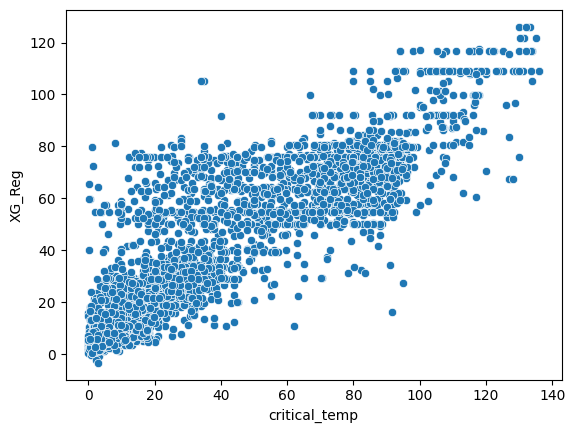

In [ ]:
import seaborn as sns
test_plot = pd.DataFrame(X_predict[['XG_Reg']]).merge(y_test, how = 'left', left_index = True, right_index = True)
sns.scatterplot(data = test_plot, x = 'critical_temp', y = 'XG_Reg')

Idealmente, los puntos deberían estar cerca de una línea diagonal de pendiente 45 grados, lo que indicaría que las predicciones coinciden perfectamente con los valores reales. En este caso parece que sigue esa tendencia por lo que las predicciones no serán muy malas

'test_plot' es un DataFrame que combina las predicciones (XG_Reg) con los valores reales (y_test)

In [ ]:
test_plot

,XG_Reg,critical_temp
19619,81.592224,85.00
1103,56.520859,85.50
18554,15.831886,11.60
7843,55.472328,16.00
3972,86.185844,107.00
...,...,...
9009,107.722176,117.00
13767,14.410445,19.80
13069,5.669207,0.46
1336,33.363026,34.00


### Boosting Gradient Regressor

El Gradient Boosting Regressor es un algoritmo de aprendizaje supervisado utilizado para problemas de regresión. Forma parte de la familia de métodos de conjunto (ensemble methods), específicamente dentro de la categoría de métodos de aumento de gradiente (gradient boosting methods).

Se utiliza el gradiente descendente para minimizar una función de pérdida.

- n_estimators: La cantidad de modelos a construir secuencialmente.
- learning_rate: Controla la contribución de cada modelo al conjunto.
- max_depth: Limita la profundidad de los árboles base.

In [ ]:
BG_Reg = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 8)
BG_Reg.fit(X_train_red_sc, y_train)

GradientBoostingRegressor(max_depth=8)

Tratamos de realizar predicciones en el conjunto de prueba (X_test) utilizando el modelo GradientBoostingRegressor (BG_Reg) que hemos entrenado previamente

In [ ]:
X_predict = X_test.copy()
X_predict['BG_Reg'] = BG_Reg.predict(X_test_red_sc)

Calculamos varias métricas de evaluación de regresión para las predicciones de nuestro modelo en el conjunto de prueba

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, X_predict['BG_Reg']).round(4))
print("MSE: ", metrics.mean_squared_error(y_test, X_predict['BG_Reg']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, X_predict['BG_Reg'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, X_predict['BG_Reg']).round(4))
print("R2: ", metrics.r2_score(y_test, X_predict['BG_Reg']).round(4))

MAE:  8.5754
MSE:  190.2273
RMSE:  13.7923
MAPE:  4.9443
R2:  0.8366


Creamos un gráfico de dispersión (scatter plot) para visualizar las predicciones (BG_Reg) en comparación con los valores reales (critical_temp)

<Axes: xlabel='critical_temp', ylabel='BG_Reg'>

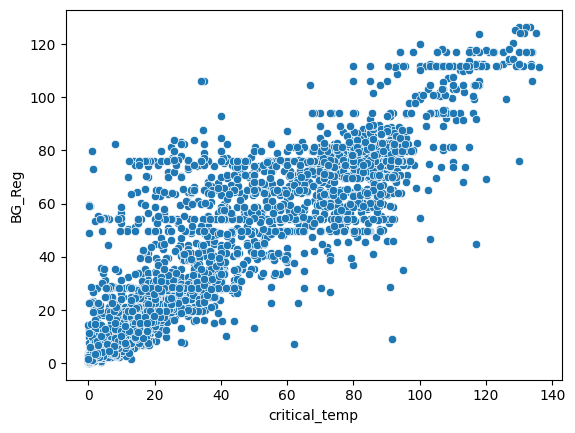

In [ ]:
import seaborn as sns
test_plot = pd.DataFrame(X_predict[['BG_Reg']]).merge(y_test, how = 'left', left_index = True, right_index = True)
sns.scatterplot(data = test_plot, x = 'critical_temp', y = 'BG_Reg')

Idealmente, los puntos deberían estar cerca de una línea diagonal de pendiente 45 grados, lo que indicaría que las predicciones coinciden perfectamente con los valores reales. En este caso parece que sigue esa tendencia por lo que las predicciones no serán muy malas

'test_plot' es un DataFrame que combina las predicciones (BG_Reg) con los valores reales (y_test)

In [ ]:
test_plot

,BG_Reg,critical_temp
19619,80.111563,85.00
1103,73.114127,85.50
18554,17.453465,11.60
7843,54.301113,16.00
3972,89.017396,107.00
...,...,...
9009,117.889924,117.00
13767,17.685209,19.80
13069,5.961907,0.46
1336,35.536613,34.00


### AdaBoost Regression

AdaBoost Regressor es un algoritmo de aprendizaje automático que forma parte de la familia de métodos de conjunto (ensemble methods). Es específicamente utilizado para problemas de regresión, donde el objetivo es predecir valores numéricos.

Realizamos una búsqueda en cuadrícula (grid search) para encontrar los mejores hiperparámetros para nuestro modelo AdaBoost Regressor.

In [ ]:
AB_Reg = AdaBoostRegressor()

grid = dict()
grid['n_estimators'] = [10, 100, 500] # number of trees
grid['learning_rate'] = [ 0.001, 0.01, 0.1, 1.0]



# define the evaluation procedure
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 1)

# define the grid search procedure
grid_search = GridSearchCV(estimator = AB_Reg, param_grid = grid, n_jobs = -1, cv = cv, scoring = 'neg_mean_absolute_error')

# execute the grid search
grid_result = grid_search.fit(X_train_red_sc, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -16.082450 using {'learning_rate': 0.01, 'n_estimators': 100}
-16.266905 (0.408427) with: {'learning_rate': 0.001, 'n_estimators': 10}
-16.374321 (0.299793) with: {'learning_rate': 0.001, 'n_estimators': 100}
-16.278817 (0.318642) with: {'learning_rate': 0.001, 'n_estimators': 500}
-16.371832 (0.337017) with: {'learning_rate': 0.01, 'n_estimators': 10}
-16.082450 (0.303782) with: {'learning_rate': 0.01, 'n_estimators': 100}
-16.390704 (0.270753) with: {'learning_rate': 0.01, 'n_estimators': 500}
-16.149134 (0.545298) with: {'learning_rate': 0.1, 'n_estimators': 10}
-16.777184 (0.344170) with: {'learning_rate': 0.1, 'n_estimators': 100}
-17.332026 (0.370670) with: {'learning_rate': 0.1, 'n_estimators': 500}
-16.606226 (0.465517) with: {'learning_rate': 1.0, 'n_estimators': 10}
-17.636741 (0.431011) with: {'learning_rate': 1.0, 'n_estimators': 100}
-17.862717 (0.817892) with: {'learning_rate': 1.0, 'n_estimators': 500}


El método fit se utiliza para ajustar el modelo a los datos de entrenamiento. "X_train_red_sc" son las características de entrenamiento escaladas, e "y_train" son las etiquetas de entrenamiento.

In [ ]:
AB_Reg = AdaBoostRegressor(learning_rate = 1, n_estimators = 100)
AB_Reg.fit(X_train_red_sc, y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=100)

- X_test_red_sc['AB_Reg'] = AB_Reg.predict(X_test_red_sc): Después de entrenar el modelo, se utilizan las características escaladas del conjunto de prueba (X_test_red_sc) para hacer predicciones utilizando el método predict del modelo AdaBoost. Las predicciones se agregan como una nueva columna llamada 'AB_Reg' al DataFrame X_test_red_sc.
- X_train_red_sc['AB_Reg'] = AB_Reg.predict(X_train_red_sc): Similar a la línea anterior, se utilizan las características escaladas del conjunto de entrenamiento (X_train_red_sc) para hacer predicciones y se agregan como una nueva columna 'AB_Reg' al DataFrame X_train_red_sc.

In [ ]:
#Evaluate Models

X_test_red_sc['AB_Reg'] = AB_Reg.predict(X_test_red_sc)
X_train_red_sc['AB_Reg'] = AB_Reg.predict(X_train_red_sc)

Imprimimos varias métricas de evaluación del rendimiento del modelo AdaBoost en el conjunto de entrenamiento.

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_train, X_train_red_sc['AB_Reg']).round(4))
print("MSE: ", metrics.mean_squared_error(y_train, X_train_red_sc['AB_Reg']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, X_train_red_sc['AB_Reg'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_train, X_train_red_sc['AB_Reg']).round(4))
print("R2: ", metrics.r2_score(y_train, X_train_red_sc['AB_Reg']).round(4))

MAE:  17.3769
MSE:  485.4204
RMSE:  22.0323
MAPE:  26.7686
R2:  0.5871


Imprimimos varias métricas de evaluación del rendimiento del modelo AdaBoost en el conjunto de prueba.

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, X_test_red_sc['AB_Reg']).round(4))
print("MSE: ", metrics.mean_squared_error(y_test, X_test_red_sc['AB_Reg']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, X_test_red_sc['AB_Reg'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, X_test_red_sc['AB_Reg']).round(4))
print("R2: ", metrics.r2_score(y_test, X_test_red_sc['AB_Reg']).round(4))

MAE:  17.468
MSE:  490.8461
RMSE:  22.155
MAPE:  18.1483
R2:  0.5783


### Random Forest Regressor

El Random Forest Regressor es un algoritmo de aprendizaje supervisado utilizado para problemas de regresión. Pertenece a la familia de modelos de conjunto y está basado en la construcción de múltiples árboles de decisión durante el entrenamiento y la toma de decisiones por medio de la agregación de las predicciones individuales de estos árboles.

Realizamos la validación cruzada con un RandomForestRegressor para evaluar el rendimiento del modelo en varias particiones del conjunto de entrenamiento.

In [ ]:
RF_Reg = RandomForestRegressor()

cv_scores = cross_val_score(RF_Reg, X_train_red_sc, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = -cv_scores  # Convert back to positive values
print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")

Cross-Validation RMSE Scores: [180.44704464 191.73456775 164.70824801 192.70048227 189.52576012]


Entrenamos un modelo de regresión RandomForest (RF_Reg) en el conjunto de entrenamiento y luego hacemos predicciones en los conjuntos de entrenamiento y prueba. También agregamos las predicciones como nuevas columnas ('RF_Reg') a los conjuntos de prueba y entrenamiento.

In [ ]:
# Train and Evaluate Models
RF_Reg.fit(X_train_red_sc, y_train)

y_pred = RF_Reg.predict(X_test_red_sc)

X_test_red_sc['RF_Reg'] = RF_Reg.predict(X_test_red_sc)
X_train_red_sc['RF_Reg'] = RF_Reg.predict(X_train_red_sc)

Visualizamos resultados

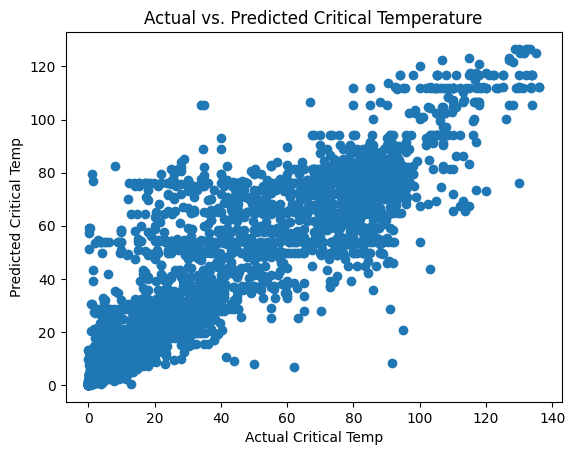

In [ ]:
# Visualize Results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Critical Temp")
plt.ylabel("Predicted Critical Temp")
plt.title("Actual vs. Predicted Critical Temperature")
plt.show()

Idealmente, los puntos deberían estar cerca de una línea diagonal de pendiente 45 grados, lo que indicaría que las predicciones coinciden perfectamente con los valores reales. En este caso parece que sigue esa tendencia por lo que las predicciones no serán muy malas

Imprimimos varias métricas de evaluación del rendimiento del modelo en el conjunto de entrenamiento.

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_train, X_train_red_sc['RF_Reg']).round(4))
print("MSE: ", metrics.mean_squared_error(y_train, X_train_red_sc['RF_Reg']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, X_train_red_sc['RF_Reg'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_train, X_train_red_sc['RF_Reg']).round(4))
print("R2: ", metrics.r2_score(y_train, X_train_red_sc['RF_Reg']).round(4))

MAE:  7.0476
MSE:  142.4618
RMSE:  11.9357
MAPE:  7.0596
R2:  0.8788


Imprimimos varias métricas de evaluación del rendimiento del modelo en el conjunto de prueba.

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, X_test_red_sc['RF_Reg']).round(4))
print("MSE: ", metrics.mean_squared_error(y_test, X_test_red_sc['RF_Reg']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, X_test_red_sc['RF_Reg'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, X_test_red_sc['RF_Reg']).round(4))
print("R2: ", metrics.r2_score(y_test, X_test_red_sc['RF_Reg']).round(4))

MAE:  8.4348
MSE:  192.3264
RMSE:  13.8682
MAPE:  4.2805
R2:  0.8348


### Stacking Regression

La idea básica de Stacking Regression es utilizar múltiples modelos base para realizar predicciones y luego entrenar un modelo final (meta-modelo) que toma las predicciones de los modelos base como entradas y produce la predicción final.

En este caso, definimos un ensemble de stacking utilizando modelos lineales (LinearRegression), un modelo de bosque aleatorio (RandomForestRegressor), y un modelo de máquinas de soporte vectorial (SVR). Luego, utilizamos otro modelo lineal (LinearRegression) como el modelo final para combinar las predicciones de los modelos base.

In [ ]:
level0 = list()
level0.append(('lr', LinearRegression()))
level0.append(('RF', RandomForestRegressor()))
level0.append(('svr', SVR()))

level1 = LinearRegression()

# define the stacking ensemble
St_reg = StackingRegressor(estimators = level0, final_estimator = level1)

# fit the model on all available data
St_reg.fit(X_train_red_sc, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('RF', RandomForestRegressor()), ('svr', SVR())],
                  final_estimator=LinearRegression())

Utilizamos el modelo de stacking (St_reg) para realizar predicciones en los conjuntos de prueba y entrenamiento, y luego agregamos esas predicciones como nuevas columnas ('St_reg') a los DataFrames correspondientes.

Esto nos permitirá evaluar el rendimiento del modelo de stacking y comparar sus predicciones con las etiquetas verdaderas (y_test e y_train).

In [ ]:
X_test_red_sc['St_reg'] = St_reg.predict(X_test_red_sc)
X_train_red_sc['St_reg'] = St_reg.predict(X_train_red_sc)

Imprimimos varias métricas de evaluación del rendimiento del modelo en el conjunto de entrenamiento.

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_train, X_train_red_sc['St_reg']).round(4))
print("MSE: ", metrics.mean_squared_error(y_train, X_train_red_sc['St_reg']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, X_train_red_sc['St_reg'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_train, X_train_red_sc['St_reg']).round(4))
print("R2: ", metrics.r2_score(y_train, X_train_red_sc['St_reg']).round(4))

MAE:  7.4241
MSE:  153.1299
RMSE:  12.3746
MAPE:  7.2522
R2:  0.8697


Imprimimos varias métricas de evaluación del rendimiento del modelo en el conjunto de prueba.

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, X_test_red_sc['St_reg']).round(4))
print("MSE: ", metrics.mean_squared_error(y_test, X_test_red_sc['St_reg']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, X_test_red_sc['St_reg'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, X_test_red_sc['St_reg']).round(4))
print("R2: ", metrics.r2_score(y_test, X_test_red_sc['St_reg']).round(4))

MAE:  8.6958
MSE:  200.6109
RMSE:  14.1637
MAPE:  4.4341
R2:  0.8276


### CONCLUSIONES

El MAE, que significa "Error Absoluto Medio" (por sus siglas en inglés, Mean Absolute Error), es una métrica que representa el promedio de las diferencias absolutas entre las predicciones del modelo y las observaciones reales.

Cuando se interpreta el MAE, un valor más bajo indica un mejor rendimiento del modelo, ya que implica que las predicciones del modelo están, en promedio, más cerca de las observaciones reales. Es una métrica fácil de entender y es útil para evaluar la precisión en problemas de regresión donde se desea minimizar la magnitud promedio de los errores absolutos.

El MAE es una métrica robusta en el sentido de que no penaliza los errores más grandes de manera desproporcionada y es menos sensible a valores atípicos en comparación con otras métricas como el Mean Squared Error (MSE) y el Root Mean Squared Error (RMSE).

Por tanto, el orden de mejor a peor modelo fijándonos en el MAE, sería:

- 1º: Random Forest Regressor
- 2º: Stacking Regression
- 3º: Boosting Gradient Regressor
- 4º: MLP Regression con el "X_train_sc" y "X_test_sc" original
- 5º: XGBoost
- 6º: MLP Regression con "X_train_red_sc" y con "X_test_red_sc"
- 7º: AdaBoost Regression